# 기계학습개론 과제1
응용통계학과 
3219****
이동현

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [4]:
df = pd.read_csv(path + "/PrOCTOR_sample_data_all.csv")
df.set_index("Drug", inplace=True)
df

,Label,MolecularWeight,XLogP,HydrogenBondDonorCount,HydrogenBondAcceptorCount,PolarSurfaceArea,FormalCharge,NumRings,RotatableBondCount,Refractivity,...,Prostate,Spleen,Liver,Fallopian Tube,Ovary,Breast,Bladder,Cervix Uteri,Small Intestine,Salivary Gland
Drug,,,,,,,,,,,,,,,,,,,,,
Abiraterone,passed,349.240565,3.965293,1,2,33.12,0,5.0,1,107.3024,...,0.804379,0.734742,1.722980,0.994414,0.943392,0.736495,0.780652,0.809155,0.377117,0.300038
Acebutolol,passed,336.204907,1.534682,3,5,87.66,0,1.0,10,94.8692,...,4.420117,6.518067,2.618737,2.319843,0.295605,10.000000,2.251212,3.500741,2.735411,5.831739
Acenocoumarol,passed,353.089937,2.684692,1,5,109.42,0,3.0,5,94.1848,...,0.282973,0.368951,0.988317,0.426425,0.430046,0.356781,0.478249,0.500222,0.492640,0.357384
Acepromazine,passed,326.145284,3.488603,0,3,23.55,0,3.0,5,99.3543,...,1.126801,7.962256,7.432229,3.192496,1.602348,1.393756,0.529358,0.387122,0.974304,6.041281
Aceprometazine,passed,326.145284,3.845218,0,3,23.55,0,3.0,4,98.9077,...,1.168346,0.453772,0.050176,2.241176,1.707206,2.094832,2.018864,2.547429,1.588867,0.826448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zidovudine,passed,267.096754,-0.298709,2,6,108.30,0,2.0,3,61.7045,...,0.007795,0.212996,0.000000,0.012702,0.000000,0.002419,0.000000,0.005181,0.521985,0.053856
Ziprasidone,passed,412.112460,4.304046,1,4,48.47,0,5.0,4,116.7248,...,10.000000,10.000000,7.432229,10.000000,10.000000,10.000000,5.551624,10.000000,4.168484,6.041281
Zoledronate,passed,271.996324,-3.851109,5,8,153.11,0,1.0,4,52.1577,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
def shownull(df):
    global missval_name
    print(f"데이터셋 차원 확인 \n {df.shape}")
    missval = df.isnull().sum()[df.isnull().sum()!=0]
    print(f"결측값 있는 변수 확인 \n {missval}")
    missval_name = missval.index #결측값 있는 변수 이름 벡터로 추출

In [6]:
shownull(df)

데이터셋 차원 확인 
 (828, 48)
결측값 있는 변수 확인 
 NumRings                1
LogpSolubility         21
Ro5                     1
Ghose                   1
Veber                   1
ExAC_loss_frequency    31
dtype: int64


### 결측값 대체 - 중앙값

1 -1) 중앙값으로 결측값을 대체

In [7]:
df_med = df.copy()
for i in range(0,len(missval_name)):
    df_med[missval_name[i]] = df_med[missval_name[i]].replace(np.NaN, df_med[missval_name[i]].median())
    print(missval_name[i],"변수의 결측값 :", df_med[missval_name[i]].isnull().sum())

NumRings 변수의 결측값 : 0
LogpSolubility 변수의 결측값 : 0
Ro5 변수의 결측값 : 0
Ghose 변수의 결측값 : 0
Veber 변수의 결측값 : 0
ExAC_loss_frequency 변수의 결측값 : 0


1 - 2) 중앙값 대체에 대한 SGD Classifier 분류

In [8]:
df_med["Label"].replace({'failed':0, 'passed':1}, inplace=True) #문자 범주형 변수를 숫자로 dummy화 함
x1 = df_med.drop("Label", axis=1)
y1 = df_med["Label"]

In [9]:
X1_train, X1_test, y_train_med, y_test_med = train_test_split(x1, y1, test_size=0.3)

In [10]:
scaler = StandardScaler()

X_train_med = X1_train.copy()
X_train_med_numval = X_train_med.drop(['Ro5', 'Ghose', 'Veber'], axis=1)
X_train_med[X_train_med_numval.columns] = scaler.fit_transform(X_train_med_numval)

X_test_med = X1_test.copy()
X_test_numval = X_test_med.drop(['Ro5', 'Ghose', 'Veber'], axis=1)
X_test_med[X_test_numval.columns] = scaler.transform(X_test_numval)

In [11]:
model_med= SGDClassifier(loss='log_loss')
model_med.fit(X_train_med,y_train_med)
y_pred_med = model_med.predict(X_test_med)

1 - 3) Accuracy, AUC, AUPRC, F1-Score, Matthews correlation coefficient (MCC)

In [12]:
print(confusion_matrix(y_test_med, y_pred_med))
#F1-score
print("F1-Score :", f1_score(y_test_med, y_pred_med))

[[  0  27]
 [  8 214]]
F1-Score : 0.9244060475161988


### 결측값 대체 - MICE

2-1) MICE로 결측값을 대체

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [14]:
df_mice = df.copy()
df_mice["Label"].replace({'failed':0, 'passed':1}, inplace=True) #문자 범주형 변수를 숫자로 dummy화 함
x2 = df_mice.drop("Label", axis=1)
y2 = df_mice["Label"]

In [15]:
imputer = IterativeImputer(random_state=2023)
x2[missval_name] = imputer.fit_transform(x2[missval_name])
print("변수의 결측값 :","\n",x2[missval_name].isnull().sum())

변수의 결측값 : 
 NumRings               0
LogpSolubility         0
Ro5                    0
Ghose                  0
Veber                  0
ExAC_loss_frequency    0
dtype: int64


2 - 2) MICE 대체에 대한 SGD Classifier 분류

In [16]:
X2_train, X2_test, y_train_mice, y_test_mice = train_test_split(x2, y2, test_size=0.3)

In [17]:
scaler = StandardScaler()

X_train_mice = X2_train.copy()
X_train_mice_numval = X_train_mice.drop(['Ro5', 'Ghose', 'Veber'], axis=1)
X_train_mice[X_train_mice_numval.columns] = scaler.fit_transform(X_train_mice_numval)

X_test_mice = X2_test.copy()
X_test_mice_numval = X_test_mice.drop(['Ro5', 'Ghose', 'Veber'], axis=1)
X_test_mice[X_test_mice_numval.columns] = scaler.transform(X_test_mice_numval)

In [18]:
model_mice = SGDClassifier(loss='log_loss')
model_mice.fit(X_train_mice,y_train_mice)
y_pred_mice = model_mice.predict(X_test_mice)

2 - 3) Accuracy, AUC, AUPRC, F1-Score, Matthews correlation coefficient (MCC)

In [19]:
print(confusion_matrix(y_test_mice, y_pred_mice))

#F1-score
print("F1-Score :", f1_score(y_test_mice, y_pred_mice))

[[  1  14]
 [  4 230]]
F1-Score : 0.9623430962343097


### 결론


<function matplotlib.pyplot.show(close=None, block=None)>

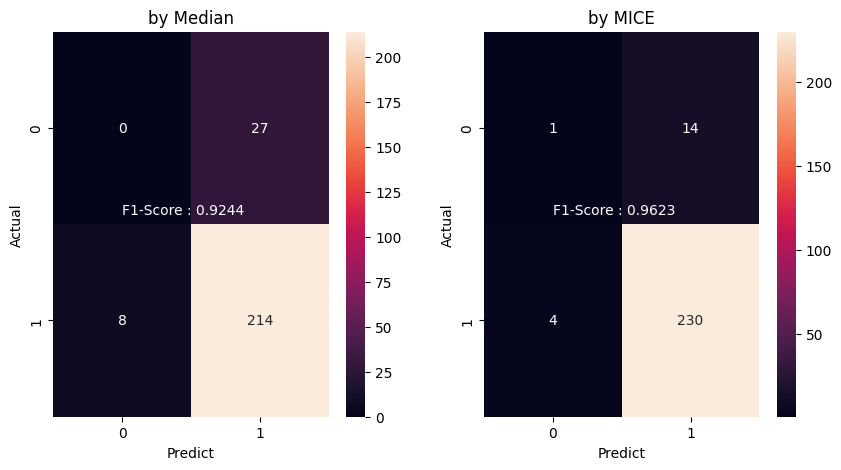

In [80]:
plt.rcParams['figure.figsize'] = [10, 5] #[width, height] (inches)
f,(ax1,ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.25)

med_cm = sns.heatmap(confusion_matrix(y_test_med, y_pred_med), annot=True, fmt='g', ax=ax1)
med_cm.set_title('by Median')
med_cm.set_ylabel('Actual')
med_cm.set_xlabel('Predict')
med_cm.annotate('F1-Score : 0.9244',xy=(0.5,0.95), color='white')

mice_cm = sns.heatmap(confusion_matrix(y_test_mice, y_pred_mice), annot=True, fmt='g', ax=ax2)
mice_cm.set_title('by MICE')
mice_cm.set_ylabel('Actual')
mice_cm.set_xlabel('Predict')
mice_cm.annotate('F1-Score : 0.9623',xy=(0.5,0.95), color='white')

plt.show

결측치가 존재하는 이 데이터에 대해 SGDClassification을 했을때, 중위값으로 결측치를 대체했을때보다 MICE로 결측치 대체를 했을때 F1-Score가 더 높은 값이 나왔다. 다만 큰 차이는 나타나지 않았으며 둘 다 높은 성능으로 나타났다. 학기 중에 제출했던 과제 코드에는 Scaler를 적용할때 범주형 변수를 고려하지 않았고, MICE를 할때 결측치를 X와 Y를 구분하지 않고 대체했다. 기존의 코드에서는 중위값대체, MICE대체에서 각각 F1-Score가 0.89, 0.91 정도 나왔었는데 다시 수정한 코드가 옳게 수정되었음을 보인다.